In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from pylab import rcParams

rcParams['figure.figsize'] = 10, 10

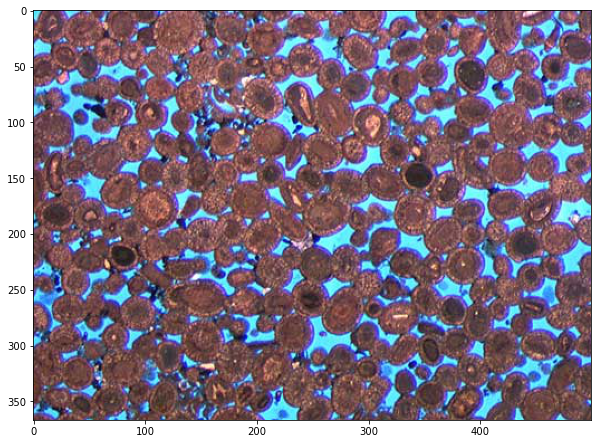

In [69]:
img = plt.imread("../imgs/poroDificil.jpg")

rcParams["figure.figsize"] = 10,10
plt.imshow(img)

In [70]:
img.shape

(367, 500, 3)

In [71]:
img[:2]

array([[[111, 228, 255],
        [104, 227, 255],
        [ 87, 226, 255],
        ...,
        [136,  90, 137],
        [135,  95, 155],
        [114,  79, 145]],

       [[106, 231, 255],
        [100, 231, 255],
        [ 81, 220, 249],
        ...,
        [134,  89, 132],
        [124,  85, 138],
        [111,  75, 137]]], dtype=uint8)

In [72]:
img = img/255
img.shape

(367, 500, 3)

In [73]:
img[:2]

array([[[0.43529412, 0.89411765, 1.        ],
        [0.40784314, 0.89019608, 1.        ],
        [0.34117647, 0.88627451, 1.        ],
        ...,
        [0.53333333, 0.35294118, 0.5372549 ],
        [0.52941176, 0.37254902, 0.60784314],
        [0.44705882, 0.30980392, 0.56862745]],

       [[0.41568627, 0.90588235, 1.        ],
        [0.39215686, 0.90588235, 1.        ],
        [0.31764706, 0.8627451 , 0.97647059],
        ...,
        [0.5254902 , 0.34901961, 0.51764706],
        [0.48627451, 0.33333333, 0.54117647],
        [0.43529412, 0.29411765, 0.5372549 ]]])

In [74]:


m, l, k = img.shape[0], img.shape[1], img.shape[2]

df = pd.DataFrame(img.reshape(m*l,k))
print(df)

               0         1         2
0       0.435294  0.894118  1.000000
1       0.407843  0.890196  1.000000
2       0.341176  0.886275  1.000000
3       0.337255  0.945098  1.000000
4       0.282353  0.925490  1.000000
...          ...       ...       ...
183495  0.266667  0.231373  0.243137
183496  0.384314  0.247059  0.239216
183497  0.376471  0.254902  0.243137
183498  0.329412  0.231373  0.211765
183499  0.368627  0.290196  0.262745

[183500 rows x 3 columns]


In [75]:
df.columns = ["R", "G", "B"]
print(df.head())

          R         G    B
0  0.435294  0.894118  1.0
1  0.407843  0.890196  1.0
2  0.341176  0.886275  1.0
3  0.337255  0.945098  1.0
4  0.282353  0.925490  1.0


In [76]:
n_clusters = 2
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df)
df["clusters"] = kmeans.labels_

In [77]:
df.sample(5)


,R,G,B,clusters
137550,0.223529,0.168627,0.164706,0
118510,0.349020,0.301961,0.796078,0
94948,0.372549,0.196078,0.215686,0
148324,0.294118,0.505882,0.600000,0
140754,0.333333,0.901961,0.976471,1


In [80]:
colors = df.groupby(["clusters"]).mean()
colors

,R,G,B
clusters,,,
0,0.434707,0.304203,0.359342
1,0.447892,0.733698,0.907869


In [89]:
index_larger = colors.sort_values(by=["B"], ascending=False)

In [102]:
por = index_larger.iloc[0].name

In [103]:
s=df.clusters.value_counts(normalize=True,sort=False).mul(100) # mul(100) is == *100

print(s) #series.to_frame() returns a dataframe


0    81.145504
1    18.854496
Name: clusters, dtype: float64


In [104]:
print(s.loc[por])

18.85449591280654


In [11]:
centers = pd.DataFrame(kmeans.cluster_centers_)
centers["clusters"] = range(n_clusters)

In [12]:
df["ind"] = df.index
df = df.merge(centers)
df = df.sort_values("ind")
df = df.drop("ind", 1)

In [13]:
quant_img = df.iloc[:,4:7].values

quant_img = quant_img.reshape(img.shape[0], img.shape[1], img.shape[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


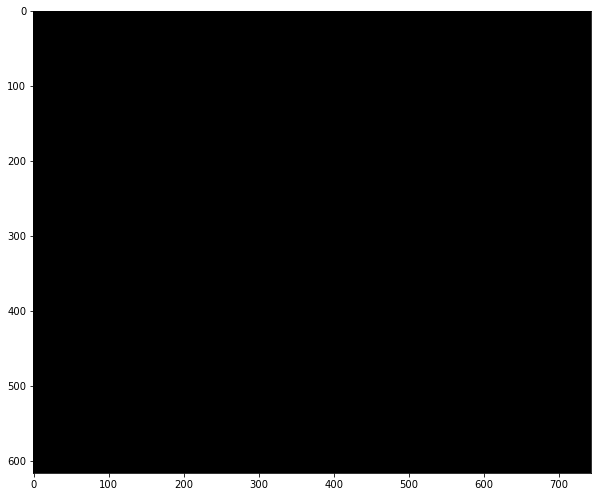

In [14]:
plt.imshow(quant_img)

In [15]:
again_img = quant_img*255
print(again_img)

[[[ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  ...
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]]

 [[ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  ...
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]]

 [[ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  ...
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]]

 ...

 [[ 0.0000000e+00 -1.5021069e-05 -2.9789808e-05]
  [ 0.0000000e+00 -1.5021069e-05 -2.978

In [16]:
df2 = pd.DataFrame(again_img.reshape(m*l,k))
df2.columns = ["R", "G", "B"]

In [17]:
print(df2)


          R         G         B
0       0.0 -0.000015 -0.000030
1       0.0 -0.000015 -0.000030
2       0.0 -0.000015 -0.000030
3       0.0 -0.000015 -0.000030
4       0.0 -0.000015 -0.000030
...     ...       ...       ...
458299  0.0  0.635347  0.909892
458300  0.0  0.635347  0.909892
458301  0.0  0.635347  0.909892
458302  0.0  0.635347  0.909892
458303  0.0  0.635347  0.909892

[458304 rows x 3 columns]


In [18]:
print(df2.R.unique())
print(df2.G.unique())
print(df2.B.unique())

[0.]
[-1.5021069e-05  6.3534659e-01]
[-2.9789808e-05  9.0989155e-01]


In [19]:
contados = df2.apply(pd.value_counts).sum(axis=1)
print(contados)

-0.000030    345454.0
-0.000015    345454.0
 0.000000    458304.0
 0.635347    112850.0
 0.909892    112850.0
dtype: float64


In [20]:
total = pd.unique(contados)
print(total)

[345454. 458304. 112850.]


In [21]:
suma = total.sum()
porcentaje = (total/suma)*100
print(porcentaje)
print("______________________ \n")
print("POROSIDAD = ", porcentaje[0])

[37.68830296 50.         12.31169704]
______________________ 

POROSIDAD =  37.68830296048038
